# Co2 Emission

## Model Building using ANN

## 1. Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.models import load_model

## 2. Load the Data

In [5]:
emission_data=pd.read_csv('Final_Emission_Data.csv')
emission_data.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [6]:
# Converting Categorical variables to ordinal
oc = OrdinalEncoder()
cols = ['vehicle_class','transmission','fuel_type']
emission_data[cols] = oc.fit_transform(emission_data[cols])
emission_data.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,0.0,2.0,4,2.0,3.0,8.5,196.0
1,0.0,2.4,4,4.0,3.0,9.6,221.0
2,0.0,1.5,4,3.0,3.0,5.9,136.0
3,11.0,3.5,6,2.0,3.0,11.1,255.0
4,11.0,3.5,6,2.0,3.0,10.6,244.0


## 3. Model Building using ANN

In [7]:
X=emission_data.drop('co2_emissions', axis=1)
y=emission_data[['co2_emissions']]

In [8]:
X.shape, y.shape

((5981, 6), (5981, 1))

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=True)

In [10]:
X_train.shape, y_train.shape

((4784, 6), (4784, 1))

In [11]:
X_test.shape, y_test.shape

((1197, 6), (1197, 1))

### 3.1 Building Model Architecture

In [14]:
model=Sequential()
model.add(Dense(units=128, input_dim=6,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               896       
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

### 3.2 Model Compilation

In [15]:
model.compile(optimizer='rmsprop',loss='mean_squared_error',metrics='mse')

## 4. Model Training

In [18]:
model_training=model.fit( x=X_train,y=y_train,batch_size=10,epochs=250, validation_data=(X_test, y_test))

Epoch 1/250
479/479 [==============================] - 1s 2ms/step - loss: 1490.7477 - mse: 1490.7477 - val_loss: 678.9547 - val_mse: 678.9547
Epoch 2/250
479/479 [==============================] - 2s 4ms/step - loss: 1447.4731 - mse: 1447.4731 - val_loss: 113.0772 - val_mse: 113.0772
Epoch 3/250
479/479 [==============================] - 1s 3ms/step - loss: 1535.9590 - mse: 1535.9590 - val_loss: 189.8657 - val_mse: 189.8657
Epoch 4/250
479/479 [==============================] - 1s 3ms/step - loss: 1533.9685 - mse: 1533.9685 - val_loss: 265.7808 - val_mse: 265.7808
Epoch 5/250
479/479 [==============================] - 1s 3ms/step - loss: 1440.6305 - mse: 1440.6305 - val_loss: 241.1773 - val_mse: 241.1773
Epoch 6/250
479/479 [==============================] - 1s 2ms/step - loss: 1458.2231 - mse: 1458.2231 - val_loss: 426.2345 - val_mse: 426.2345
Epoch 7/250
479/479 [==============================] - 1s 2ms/step - loss: 1532.8622 - mse: 1532.8622 - val_loss: 165.5706 - val_mse: 165.5706

Epoch 58/250
479/479 [==============================] - 1s 2ms/step - loss: 1288.9916 - mse: 1288.9916 - val_loss: 201.5104 - val_mse: 201.5104
Epoch 59/250
479/479 [==============================] - 1s 2ms/step - loss: 1287.2367 - mse: 1287.2367 - val_loss: 131.7170 - val_mse: 131.7170
Epoch 60/250
479/479 [==============================] - 1s 2ms/step - loss: 1297.6089 - mse: 1297.6089 - val_loss: 238.8219 - val_mse: 238.8219
Epoch 61/250
479/479 [==============================] - 1s 1ms/step - loss: 1317.2380 - mse: 1317.2380 - val_loss: 500.8163 - val_mse: 500.8163
Epoch 62/250
479/479 [==============================] - 1s 2ms/step - loss: 1293.6942 - mse: 1293.6942 - val_loss: 419.1694 - val_mse: 419.1694
Epoch 63/250
479/479 [==============================] - 1s 2ms/step - loss: 1281.7560 - mse: 1281.7560 - val_loss: 134.3806 - val_mse: 134.3806
Epoch 64/250
479/479 [==============================] - 1s 2ms/step - loss: 1281.9248 - mse: 1281.9248 - val_loss: 131.7352 - val_mse: 1

Epoch 115/250
479/479 [==============================] - 1s 2ms/step - loss: 1149.3607 - mse: 1149.3607 - val_loss: 208.3367 - val_mse: 208.3367
Epoch 116/250
479/479 [==============================] - 1s 2ms/step - loss: 1195.1545 - mse: 1195.1545 - val_loss: 398.1250 - val_mse: 398.1250
Epoch 117/250
479/479 [==============================] - 1s 2ms/step - loss: 1159.9115 - mse: 1159.9115 - val_loss: 96.0137 - val_mse: 96.0137
Epoch 118/250
479/479 [==============================] - 1s 2ms/step - loss: 1175.6952 - mse: 1175.6952 - val_loss: 113.5511 - val_mse: 113.5511
Epoch 119/250
479/479 [==============================] - 1s 2ms/step - loss: 1224.0339 - mse: 1224.0339 - val_loss: 102.1197 - val_mse: 102.1197
Epoch 120/250
479/479 [==============================] - 1s 2ms/step - loss: 1179.2332 - mse: 1179.2332 - val_loss: 284.9440 - val_mse: 284.9440
Epoch 121/250
479/479 [==============================] - 1s 2ms/step - loss: 1193.2505 - mse: 1193.2505 - val_loss: 116.4315 - val_m

479/479 [==============================] - 2s 3ms/step - loss: 1077.6357 - mse: 1077.6357 - val_loss: 137.9979 - val_mse: 137.9979
Epoch 172/250
479/479 [==============================] - 1s 2ms/step - loss: 1098.0200 - mse: 1098.0200 - val_loss: 117.7820 - val_mse: 117.7820
Epoch 173/250
479/479 [==============================] - 1s 2ms/step - loss: 1039.6514 - mse: 1039.6514 - val_loss: 245.7845 - val_mse: 245.7845
Epoch 174/250
479/479 [==============================] - 1s 2ms/step - loss: 1092.7736 - mse: 1092.7736 - val_loss: 127.3244 - val_mse: 127.3244
Epoch 175/250
479/479 [==============================] - 1s 2ms/step - loss: 1113.3984 - mse: 1113.3984 - val_loss: 167.8706 - val_mse: 167.8706
Epoch 176/250
479/479 [==============================] - 1s 2ms/step - loss: 1045.8333 - mse: 1045.8333 - val_loss: 104.6605 - val_mse: 104.6605
Epoch 177/250
479/479 [==============================] - 1s 3ms/step - loss: 1039.6652 - mse: 1039.6652 - val_loss: 175.9386 - val_mse: 175.9386

Epoch 228/250
479/479 [==============================] - 1s 2ms/step - loss: 988.5616 - mse: 988.5616 - val_loss: 114.9163 - val_mse: 114.9163
Epoch 229/250
479/479 [==============================] - 1s 2ms/step - loss: 1021.8429 - mse: 1021.8429 - val_loss: 128.7088 - val_mse: 128.7088
Epoch 230/250
479/479 [==============================] - 1s 2ms/step - loss: 977.8350 - mse: 977.8350 - val_loss: 110.2903 - val_mse: 110.2903
Epoch 231/250
479/479 [==============================] - 1s 2ms/step - loss: 966.2842 - mse: 966.2842 - val_loss: 98.5537 - val_mse: 98.5537
Epoch 232/250
479/479 [==============================] - 1s 2ms/step - loss: 962.6583 - mse: 962.6583 - val_loss: 152.2343 - val_mse: 152.2343
Epoch 233/250
479/479 [==============================] - 1s 2ms/step - loss: 982.1213 - mse: 982.1213 - val_loss: 129.6483 - val_mse: 129.6483
Epoch 234/250
479/479 [==============================] - 1s 2ms/step - loss: 995.0164 - mse: 995.0164 - val_loss: 241.0820 - val_mse: 241.0820

## 5. Model Performance

### Model Mean Squared Error Performance

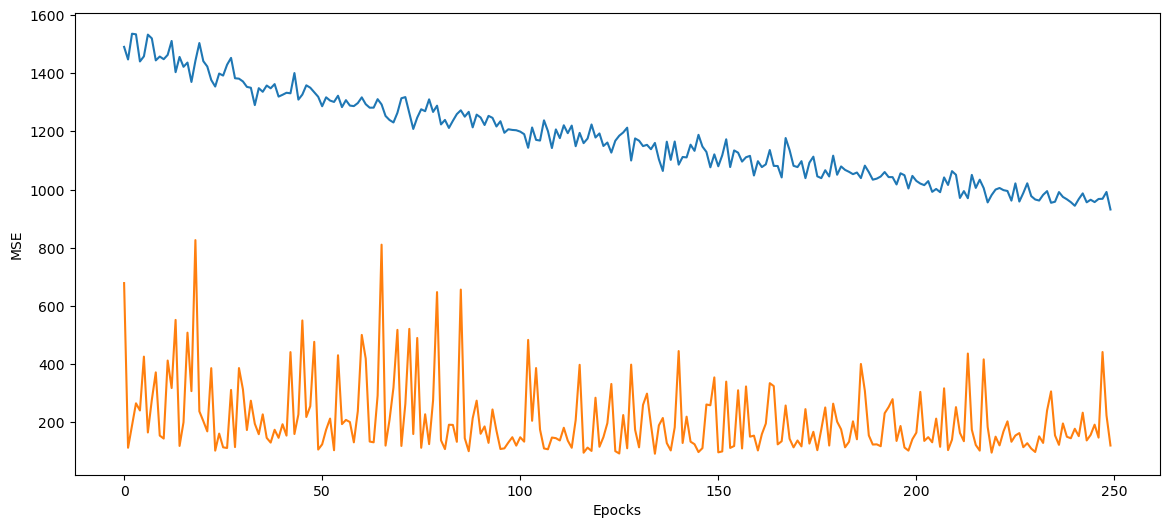

In [19]:
plt.figure(figsize=(14,6))
plt.plot(model_training.history['mse'], label='Train Performance')
plt.plot(model_training.history['val_mse'], label='Test Performance')

plt.xlabel('Epocks')
plt.ylabel('MSE')
plt.show()

### Model Loss Performance 

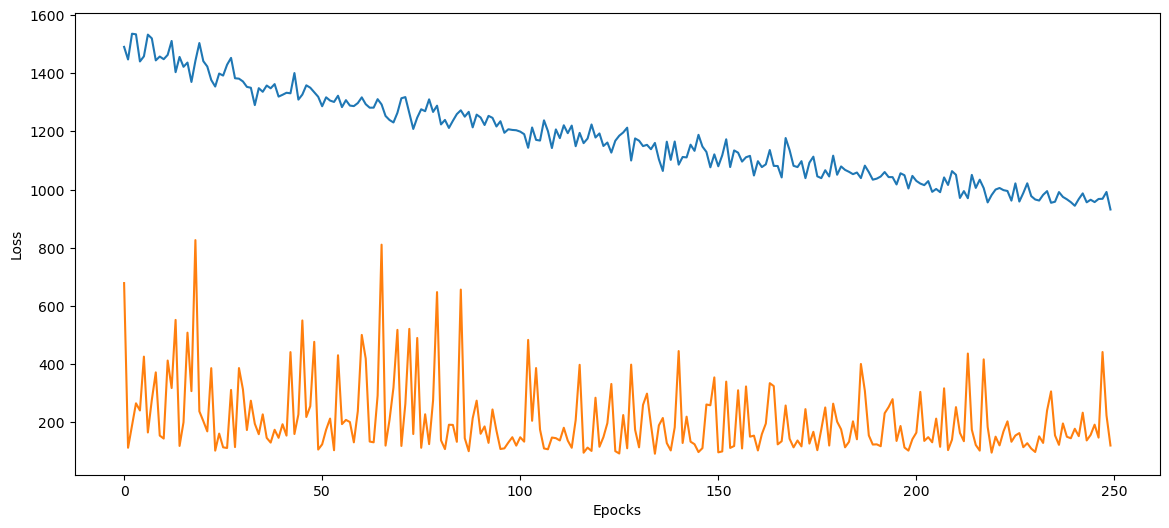

In [20]:
plt.figure(figsize=(14,6))
plt.plot(model_training.history['loss'], label='Train Loss')
plt.plot(model_training.history['val_loss'], label='Test Loss')

plt.xlabel('Epocks')
plt.ylabel('Loss')
plt.show()

## 6. Model Evaluation

In [21]:
model.evaluate(x=X_train, y=y_train)

150/150 [==============================] - 0s 1ms/step - loss: 113.3319 - mse: 113.3319


[113.33192443847656, 113.33192443847656]

In [22]:
model.evaluate(x=X_test, y=y_test)

38/38 [==============================] - 0s 820us/step - loss: 120.7382 - mse: 120.7382


[120.73818969726562, 120.73818969726562]

## 7. Model Prediction

In [23]:
y_pred=model.predict(X_test)

38/38 [==============================] - 0s 1ms/step


In [24]:
y_test.iloc[[3]]

,co2_emissions
5891,167.0


In [25]:
print('The predicted model for index no 3 for test data is',y_pred[3])

The predicted model for index no 3 for test data is [179.07483]


## 8. Model Deployment

In [26]:
# Deploying the intelligence
model.save('ANN_Model.h5')

In [27]:
# Loading the pre-trained model
loaded_model=load_model('ANN_Model.h5')

In [28]:
y_pred_load=loaded_model.predict(X_test)

38/38 [==============================] - 0s 1ms/step


In [29]:
y_test.iloc[[5]]

,co2_emissions
4186,344.0


In [30]:
print('The predicted model for index no 5 for test data is',y_pred_load[5])

The predicted model for index no 5 for test data is [312.9535]


## 9. User Interface Platform

In [31]:
df=pd.read_csv('Final_Emission_Data.csv')
df.head()

,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_comb,co2_emissions
0,compact,2.0,4,Automatic with select shift,Premium gasoline,8.5,196.0
1,compact,2.4,4,Manual,Premium gasoline,9.6,221.0
2,compact,1.5,4,Continuously variable,Premium gasoline,5.9,136.0
3,suv - small,3.5,6,Automatic with select shift,Premium gasoline,11.1,255.0
4,suv - small,3.5,6,Automatic with select shift,Premium gasoline,10.6,244.0


In [32]:
i1 = input("Enter vehicle class :")
i2 = float(input("Enter engine size :"))
i3 = float(input("Enter Number of cylinders :"))
i4 = input("Enter Transmission type :")
i5 = input("Enter Fuel type :")
i6 = float(input("Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :"))

input_data = pd.DataFrame({'vehicle_class':i1,'engine_size':i2,'cylinders':i3,
                           'transmission':i4,'fuel_type':i5,
                           'fuel_consumption_comb(l/100km)':i6},index=[1])

input_data['vehicle_class']  =input_data['vehicle_class'].map({'compact':0.0,'full-size':1.0,'mid-size':2.0,'minicompact':3.0,'minivan':4.0,
                                                               'pickup truck - small':5.0,'pickup truck - standard':6.0,'special purpose vehicle':7.0,
                                                               'station wagon - mid-size':8.0,'station wagon - small':9.0,'subcompact':10.0,
                                                               'suv - small':11.0, 'suv - standard':12.0,'two-seater':13.0,'van - cargo':14.0,
                                                               'van - passenger':15.0})
input_data['transmission']  =input_data['transmission'].map({'Automatic':0.0,'Automated manual':1.0,'Automatic with select shift':2.0,'Continuously variable':3.0,'Manual':4.0})
input_data['fuel_type']  =input_data['fuel_type'].map({'Diesel':0.0,'Ethanol (E85)':1.0,'Natural gas':2.0,'Premium gasoline':3.0,'Regular gasoline':4.0})

pred =loaded_model.predict(input_data)
print("The Co2 emmitted from your car is {} in grams per kilometer.".format(pred))

Enter vehicle class :compact
Enter engine size :2.4
Enter Number of cylinders :4
Enter Transmission type :Manual
Enter Fuel type :Premium gasoline
Enter the combined fuel consumption rating (55% city, 45% highway), in L/100 km :9.6
1/1 [==============================] - 0s 18ms/step
The Co2 emmitted from your car is [[226.76237]] in grams per kilometer.
